# The Sparks Foundation #GRIPJULY21
# Task-1(Prediction using Supervised ML)

# Author: Vidhi Bharadwaj

# Importing Libraries

In [21]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the Dataset from URL

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Cleaning and Formatting the Data

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Our data is already cleaned and has no null values in it, since it only contains 2 variables.

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

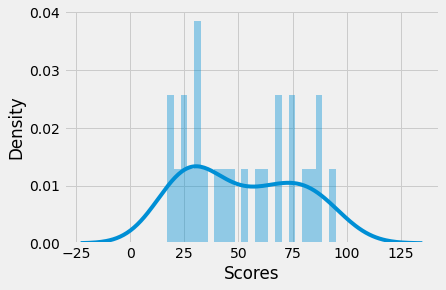

In [22]:
plt.style.use('fivethirtyeight')
sns.distplot(df['Scores'], bins=25)

<AxesSubplot:xlabel='Hours', ylabel='Density'>

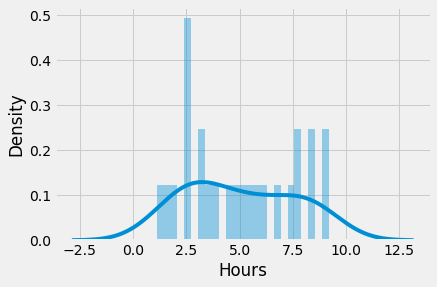

In [24]:
plt.style.use('fivethirtyeight')
sns.distplot(df['Hours'], bins=25)

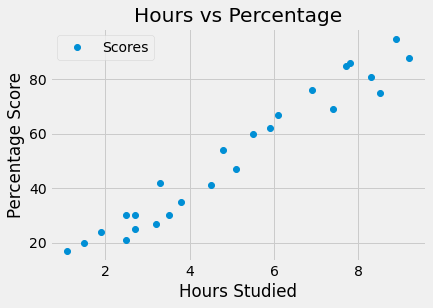

In [17]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

It can be noticed that there is a positive linear regression between the hours studied and percentage score

# Splitting the Data in train and test

In [18]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the model using Linear Regression

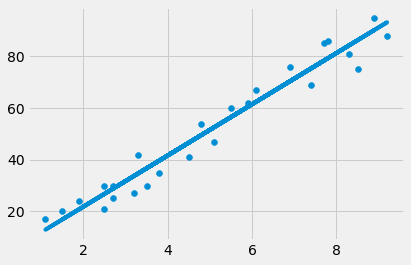

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Make Predictions

In [28]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Compare Actual & Predicted 

In [29]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dff 

,Actual,Predicted
0,20,17.0
1,27,42.0
2,69,85.0
3,30,21.0
4,62,67.0


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [34]:
hours = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 88.0


# Evaluating the Model

In [35]:
from sklearn import metrics  
print(' mean_squared_error:', 
      metrics. mean_squared_error(y_test, y_pred)) 

 mean_squared_error: 119.2


In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 9.6
